<a href="https://colab.research.google.com/github/lolalola101/library/blob/main/laba5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Описание данных:
   feature1  feature2
0 -7.338988 -7.729954
1 -7.740041 -7.264665
2 -1.686653  7.793442
3  4.422198  3.071947
4 -8.917752 -7.888196
         feature1    feature2
count  300.000000  300.000000
mean    -1.590000    1.356727
std      4.911284    6.641879
min     -9.351272   -9.182031
25%     -6.242487   -6.311418
50%     -2.544467    1.984582
75%      3.937954    8.295815
max      6.954537   11.734455
--------------------------------------
K-средних: Силуэтный коэффициент = 0.8482330810203894
DBSCAN: Силуэтный коэффициент = 0.8482330810203894
Иерархическая кластеризация: Силуэтный коэффициент = 0.8482330810203894


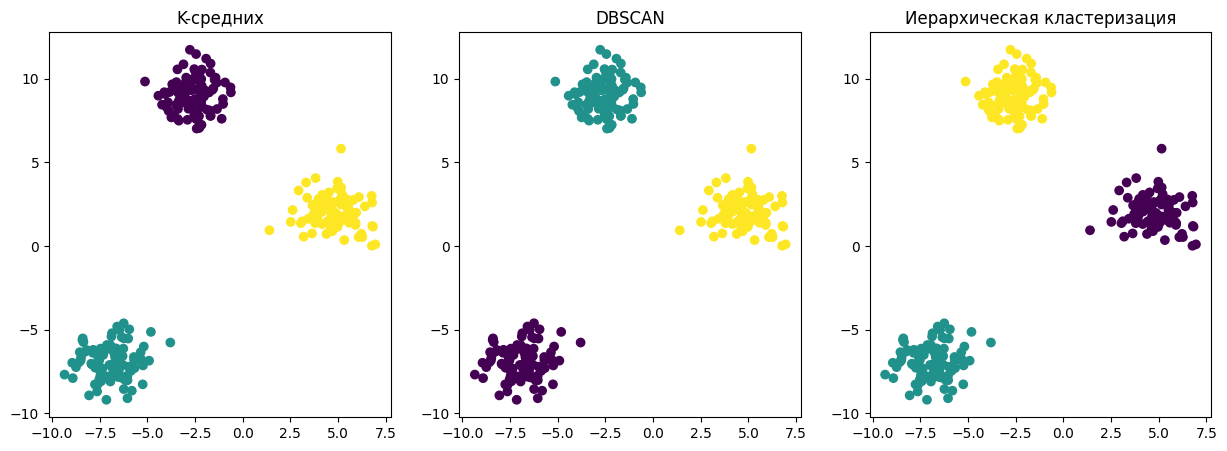

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Создание синтетических данных:
from sklearn.datasets import make_blobs

# Создаем данные, состоящие из трех кластеров
n_samples = 300
centers = 3
cluster_std = 1.0 #Разброс кластеров
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Создаем DataFrame для удобства
df = pd.DataFrame(X, columns=['feature1', 'feature2'])

print("Описание данных:")
print(df.head())
print(df.describe())
print("--------------------------------------")

# 2. Подготовка данных:

# Масштабируем признаки, чтобы они имели одинаковый масштаб
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Выбор и обучение моделей кластеризации:

# a) K-средних:
kmeans = KMeans(n_clusters=3, random_state=42, n_init = 'auto') # Укажите n_init
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

# b) DBSCAN:
dbscan = DBSCAN(eps=0.5, min_samples=5) # eps и min_samples нужно подбирать
dbscan.fit(X_scaled)
labels_dbscan = dbscan.labels_

# c) Иерархическая кластеризация (агломеративная):
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(X_scaled)
labels_agglomerative = agglomerative.labels_

# 4. Оценка результатов кластеризации:

# a) K-средних:
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"K-средних: Силуэтный коэффициент = {silhouette_kmeans}")

# b) DBSCAN:
# Силуэтный коэффициент не определен, если есть только один кластер
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
    print(f"DBSCAN: Силуэтный коэффициент = {silhouette_dbscan}")
else:
    print("DBSCAN: Только один кластер, силуэтный коэффициент не определен.")

# c) Иерархическая кластеризация:
silhouette_agglomerative = silhouette_score(X_scaled, labels_agglomerative)
print(f"Иерархическая кластеризация: Силуэтный коэффициент = {silhouette_agglomerative}")

# 5. Визуализация результатов кластеризации:
plt.figure(figsize=(15, 5))

# a) K-средних:
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-средних')

# b) DBSCAN:
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN')

# c) Иерархическая кластеризация:
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels_agglomerative, cmap='viridis')
plt.title('Иерархическая кластеризация')

plt.show()
# 6. Анализ и сравнение результатов:

# Интерпретация:
# - K-средних хорошо работает, когда кластеры имеют сферическую форму
#   и примерно одинаковый размер.
# - DBSCAN хорошо выделяет кластеры произвольной формы и может находить выбросы.
#   Параметры eps и min_samples требуют тщательной настройки.
# - Иерархическая кластеризация создает иерархию кластеров,
#   которую можно визуализировать в виде дендрограммы.

# Сравнительный анализ:
# - K-средних: Простота, скорость, требует заранее заданное количество кластеров,
#   плохо работает с кластерами сложной формы.
# - DBSCAN: Может находить кластеры произвольной формы, не требует задавать количество
#   кластеров заранее, чувствителен к параметрам, требует масштабирования данных.
# - Иерархическая кластеризация: Предоставляет иерархию кластеров,
#   может быть вычислительно дорогой для больших наборов данных.
